In [1070]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Background**

**Grand Theme** : Fleet Management

**Stakeholder** : Taxi Company

kapan dan dimana armada harus ditugaskan.
- A well-managed armada helps reduce passenger wait times (segi customer experience)
- tidak banyak driver yang berkeliaran di area demand yang kecil (segi driver)
- dengan distribusi taksi yang dilakukan secara strategic, akan dapat mengurangi kemacetan

Potential Analysis:
- LocationID (Zone) dengan demand terbesar/terkecil (bikin heatmap) *v*
- Rush hour jam berapa? demandnya berapa? (dipisah weekdays/weekend) *v*
- pas rush hour, zone yg mana yg rame
- bikin 1 kolom baru "TRIP DURATION" (belom tau rekomendasinya apa)

- profitable zone (diluar tema?)
- trip duration tiap zone

# **Data Cleaning**

Findings: 
- kolom ehail_fee kosong (drop)
- Location ID bisa diganti dengan nama locationnya (terdapat shapefile di website ny.gov)
- Nomor pada location id diurutkan berdasarkan alphabetical nama zona aslinya (bukan berdasarkan kedekatan zona)
- 4324 missing values pada kolom:
    - Store_and_fwd_flag : This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor.
    -  RatecodeID : The final rate code is in effect at the end of the trip. standard rate, JFK, newartk, etc
    - passenger_count: The number of passengers in the vehicle. 
    - payment_type : how the passenger paid (numeric 1-6) 
    - trip_type : Street-hail(1)/dispatch(2) 
    - congestion_surcharge : an additional fee imposed on taxi trips that pass through designated congestion zones.
- congestion_surcharge ada value yang -2.75 (sedangkan di website cuma ada 2.75, 2.5, 75cents, dan 0)
- Trip duration bisa dicari dengan Dropoff - Pickup time
- Trip duration ada yang 0 (pickup time dan dropoff time sama) 
- ada 1 data dari 2009, 2 data dari 2022 
- total amount ada yg (-) 
- tiap ratecode starting fare berbeda2
- jumlah passanger ada yang lebih dari 5, ada yang 0
- ada transaksi yang 0 (total amount 0) **(v)**

In [1071]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df

C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\4164042217.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [1072]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [1073]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

#### Drop **ehail_fee** column

In [1074]:
df.drop('ehail_fee', axis = 1, inplace=True)

#### Drop **RatecodeID** yg 0

In [1075]:
df.dropna(subset=['RatecodeID'], inplace=True)

In [1076]:
df.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

In [1077]:
df.dropna(subset=['trip_type'], inplace=True)

In [1078]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [1079]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


#### New columns: **Trip Duration** (drop yang anomali)

In [1080]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['Trip Duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['Trip Duration'] = df['Trip Duration']

In [1081]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,0 days 00:07:59
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,0 days 00:10:45
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,0 days 00:06:01
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,0 days 00:09:32


In [1082]:
df.sort_values(by='Trip Duration', ascending=False)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
26403,2,2023-01-13 22:13:15,2023-01-14 22:13:08,N,1.0,193,7,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.0,1.0,0.00,0 days 23:59:53
2130,2,2023-01-02 15:46:00,2023-01-03 15:45:15,N,1.0,193,193,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.0,1.0,0.00,0 days 23:59:15
38200,2,2023-01-19 20:12:15,2023-01-20 20:11:25,N,1.0,193,193,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.0,1.0,0.00,0 days 23:59:10
33850,2,2023-01-18 06:58:14,2023-01-19 06:57:10,N,1.0,74,41,1.0,1.09,7.9,0.0,0.5,0.00,0.0,1.0,9.40,1.0,1.0,0.00,0 days 23:58:56
54199,2,2023-01-27 08:56:22,2023-01-28 08:55:17,N,1.0,43,239,1.0,1.89,11.4,0.0,0.5,3.91,0.0,1.0,19.56,1.0,1.0,2.75,0 days 23:58:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54660,1,2023-01-27 13:56:37,2023-01-27 13:56:37,Y,1.0,14,264,1.0,0.00,19.5,0.0,1.5,0.00,0.0,1.0,21.00,2.0,1.0,0.00,0 days 00:00:00
58555,1,2023-01-29 12:52:55,2023-01-29 12:52:55,Y,1.0,210,264,1.0,0.00,10.0,0.0,1.5,0.00,0.0,1.0,11.50,2.0,1.0,0.00,0 days 00:00:00
35995,2,2023-01-19 03:36:44,2023-01-19 03:36:44,N,1.0,264,264,1.0,0.00,2.5,0.5,0.5,0.00,0.0,0.3,3.80,2.0,1.0,0.00,0 days 00:00:00
42986,2,2023-01-22 10:38:23,2023-01-22 10:38:23,N,5.0,264,264,1.0,0.18,20.0,0.0,0.0,0.00,0.0,0.0,20.00,1.0,2.0,0.00,0 days 00:00:00


**Trip Duration** ada yang 0

potensi drop yg trip distancenya juga 0

In [1083]:
df[df['Trip Duration'] == pd.Timedelta(days=0, hours=0, minutes=0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
1246,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1.0,226,264,1.0,0.0,3.0,1.0,0.5,10.00,0.0,1.0,15.50,1.0,1.0,0.0,0 days
2015,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1.0,3,264,2.0,0.0,24.0,0.0,1.5,0.00,0.0,1.0,25.50,2.0,1.0,0.0,0 days
2088,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1.0,264,264,1.0,0.0,3.0,0.0,0.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0,0 days
2346,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1.0,145,264,1.0,0.0,3.7,0.0,1.5,0.00,0.0,1.0,5.20,2.0,1.0,0.0,0 days
2707,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5.0,255,264,2.0,0.0,40.0,0.0,0.0,0.00,0.0,0.0,40.00,1.0,2.0,0.0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58405,2,2023-01-29 10:56:28,2023-01-29 10:56:28,N,1.0,264,264,1.0,0.0,3.0,0.0,0.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0,0 days
58555,1,2023-01-29 12:52:55,2023-01-29 12:52:55,Y,1.0,210,264,1.0,0.0,10.0,0.0,1.5,0.00,0.0,1.0,11.50,2.0,1.0,0.0,0 days
58900,2,2023-01-29 15:27:30,2023-01-29 15:27:30,N,1.0,42,264,1.0,0.0,3.0,0.0,0.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0,0 days
61520,2,2023-01-30 20:39:10,2023-01-30 20:39:10,N,5.0,63,264,1.0,0.0,25.0,0.0,0.0,0.01,0.0,0.0,25.01,1.0,2.0,0.0,0 days


- Drop yang trip duration 0 **&** trip distance 0 (potensi kesalahan input)
- data dengan trip duration 0 namun distance != 0 masih terdapat kemungkinan order tersebut terjadi

In [1084]:
df.drop(df[(df['Trip Duration'] == pd.Timedelta(days=0, hours=0, minutes=0)) & (df['trip_distance'] == 0)].index, inplace=True)

In [1085]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,0 days 00:07:59
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,0 days 00:10:45
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,0 days 00:06:01
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,0 days 00:09:32


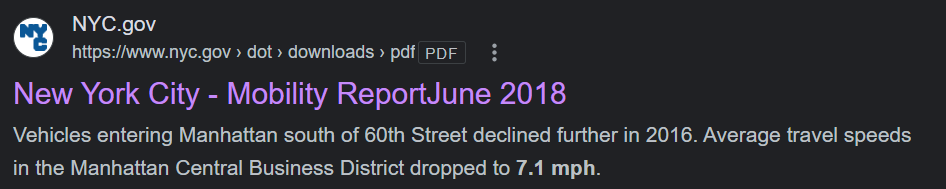

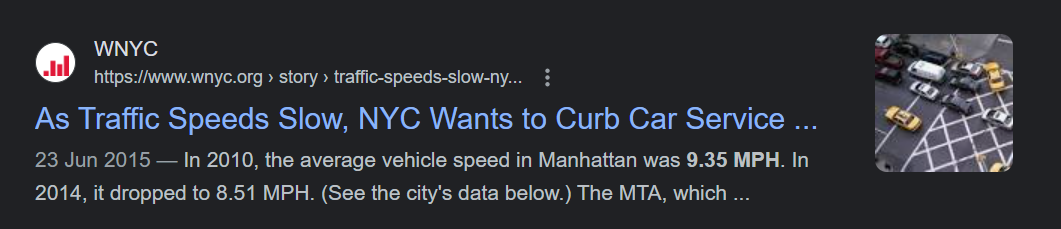

8.57 minutes to travel 1 mile at a speed of 7 mph.

drop yang **(duration <1)** & **(distance>1)**

In [1086]:
df[(df['Trip Duration'] < pd.Timedelta(minutes=1)) & (df['trip_distance'] > 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,1.0,1.5,0.0,0.00,1.0,5.50,3.0,1.0,0.0,0 days 00:00:05
195,1,2023-01-01 03:00:27,2023-01-01 03:00:54,N,3.0,251,251,1.0,4.90,23.0,1.0,1.0,0.0,6.55,1.0,31.55,2.0,1.0,0.0,0 days 00:00:27
198,1,2023-01-01 03:06:11,2023-01-01 03:06:41,N,5.0,101,101,1.0,1.30,90.0,0.0,0.0,0.0,0.00,0.0,90.00,3.0,2.0,0.0,0 days 00:00:30
199,1,2023-01-01 03:07:26,2023-01-01 03:07:50,N,5.0,101,101,1.0,1.30,60.0,0.0,0.0,0.0,0.00,0.0,60.00,1.0,2.0,0.0,0 days 00:00:24
512,1,2023-01-01 12:02:28,2023-01-01 12:02:59,N,5.0,92,92,1.0,3.40,15.8,0.0,0.0,0.0,0.00,0.0,15.80,1.0,2.0,0.0,0 days 00:00:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62065,1,2023-01-31 09:31:50,2023-01-31 09:32:04,N,1.0,145,145,1.0,3.60,3.0,0.0,1.5,0.0,0.00,1.0,4.50,2.0,1.0,0.0,0 days 00:00:14
62285,1,2023-01-31 10:41:24,2023-01-31 10:41:38,N,1.0,41,41,1.0,3.10,3.0,0.0,1.5,4.0,0.00,1.0,8.50,1.0,1.0,0.0,0 days 00:00:14
62987,2,2023-01-31 16:21:52,2023-01-31 16:21:55,N,5.0,166,166,2.0,3.69,60.0,0.0,0.0,0.0,0.00,1.0,61.00,1.0,2.0,0.0,0 days 00:00:03
63486,1,2023-01-31 19:17:15,2023-01-31 19:17:24,N,1.0,7,7,1.0,5.90,3.0,2.5,1.5,0.0,0.00,1.0,7.00,1.0,1.0,0.0,0 days 00:00:09


In [1087]:
df.drop(df[(df['Trip Duration'] < pd.Timedelta(minutes=1)) & (df['trip_distance'] > 1)].index, inplace=True)

In [1088]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,0 days 00:07:59
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,0 days 00:10:45
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,0 days 00:06:01
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,0 days 00:09:32


#### Drop total amount yg negative

In [1089]:
df[df['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,0 days 00:00:26
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,0 days 00:00:20
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,0 days 00:07:49
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,0 days 00:03:17
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,0 days 00:01:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,0 days 00:00:13
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,0 days 00:00:28
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,0 days 00:00:14
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0,0 days 00:01:02


In [1090]:
df[df['fare_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,0 days 00:00:26
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,0 days 00:00:20
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,0 days 00:07:49
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,0 days 00:03:17
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,0 days 00:01:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,0 days 00:00:13
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,0 days 00:00:28
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,0 days 00:00:14
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0,0 days 00:01:02


In [1091]:
df = df[df['total_amount'] >= 0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,0 days 00:07:59
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,0 days 00:10:45
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,0 days 00:06:01
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,0 days 00:09:32


### New columns: **Location Name & Geospatial** (drop location 264 & 265)


untuk membuat map tableau

In [1092]:
import geopandas as gpd

shapefile_zip_path = 'taxi_zones.zip'


gdf_shapefile = gpd.read_file('zip://' + shapefile_zip_path)

gdf_shapefile

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


#### Merge PU Location INFO

In [1093]:
merged_df = pd.merge(df, gdf_shapefile, left_on='PULocationID', right_on='OBJECTID', how='left')

merged_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,0 days 00:11:01,166.0,0.068824,0.000255,Morningside Heights,166.0,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,0 days 00:06:46,24.0,0.047000,0.000061,Bloomingdale,24.0,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,0 days 00:06:20,223.0,0.166022,0.000764,Steinway,223.0,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,0 days 00:05:49,41.0,0.052793,0.000143,Central Harlem,41.0,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,0 days 00:05:58,41.0,0.052793,0.000143,Central Harlem,41.0,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63566,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,2.0,0.00,0 days 00:07:59,130.0,0.142028,0.000468,Jamaica,130.0,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ..."
63567,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,0.00,0 days 00:10:45,65.0,0.044607,0.000082,Downtown Brooklyn/MetroTech,65.0,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19..."
63568,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,0.00,0 days 00:06:01,244.0,0.080569,0.000360,Washington Heights South,244.0,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ..."
63569,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,2.75,0 days 00:09:32,74.0,0.110291,0.000295,East Harlem North,74.0,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."


In [1094]:
pd.set_option('display.max_rows', 30)
(merged_df.isnull().sum() / len(merged_df)) * 100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.000000
trip_type                0.000000
congestion_surcharge     0.000000
Trip Duration            0.000000
OBJECTID                 0.286294
Shape_Leng               0.286294
Shape_Area               0.286294
zone                     0.286294
LocationID               0.286294
borough                  0.286294
geometry                 0.286294
dtype: float64

In [1095]:
pd.set_option('display.max_rows', 20)
merged_df[merged_df['OBJECTID'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
114,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.00,3.0,...,1.0,0.0,0 days 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,None
241,2,2023-01-01 03:16:39,2023-01-01 03:16:42,N,5.0,264,264,1.0,0.00,10.0,...,2.0,0.0,0 days 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,None
279,2,2023-01-01 05:29:35,2023-01-01 05:29:37,N,5.0,264,264,1.0,0.00,12.0,...,2.0,0.0,0 days 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,None
1002,1,2023-01-01 18:33:47,2023-01-01 19:12:24,N,1.0,265,14,1.0,0.00,57.2,...,1.0,0.0,0 days 00:38:37,NaN,NaN,NaN,NaN,NaN,NaN,None
1321,2,2023-01-02 04:41:06,2023-01-02 04:41:08,N,1.0,264,264,1.0,0.00,3.0,...,1.0,0.0,0 days 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61594,2,2023-01-31 07:54:28,2023-01-31 09:24:48,N,1.0,265,92,1.0,16.92,89.1,...,1.0,0.0,0 days 01:30:20,NaN,NaN,NaN,NaN,NaN,NaN,None
61609,1,2023-01-31 08:16:40,2023-01-31 08:45:26,N,1.0,264,264,1.0,0.00,19.5,...,1.0,0.0,0 days 00:28:46,NaN,NaN,NaN,NaN,NaN,NaN,None
61956,2,2023-01-31 11:00:15,2023-01-31 11:00:17,N,5.0,264,264,1.0,0.18,10.0,...,2.0,0.0,0 days 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,None
63412,2,2023-01-31 21:24:02,2023-01-31 21:24:03,N,5.0,264,264,1.0,0.00,35.0,...,2.0,0.0,0 days 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,None


In [1096]:
# DROP PULocationID yang 263-265 
merged_df.dropna(subset=['OBJECTID'], inplace=True)

In [1097]:
pd.set_option('display.max_rows', 30)
(merged_df.isnull().sum() / len(merged_df)) * 100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
Trip Duration            0.0
OBJECTID                 0.0
Shape_Leng               0.0
Shape_Area               0.0
zone                     0.0
LocationID               0.0
borough                  0.0
geometry                 0.0
dtype: float64

In [1098]:
# Drop DOLocationID 264-265
merged_df = merged_df[~merged_df['DOLocationID'].isin([264, 265])] #~ invert condition

In [1099]:
merged_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,0 days 00:11:01,166.0,0.068824,0.000255,Morningside Heights,166.0,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,0 days 00:06:46,24.0,0.047000,0.000061,Bloomingdale,24.0,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,0 days 00:06:20,223.0,0.166022,0.000764,Steinway,223.0,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,0 days 00:05:49,41.0,0.052793,0.000143,Central Harlem,41.0,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,0 days 00:05:58,41.0,0.052793,0.000143,Central Harlem,41.0,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63566,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,2.0,0.00,0 days 00:07:59,130.0,0.142028,0.000468,Jamaica,130.0,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ..."
63567,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,0.00,0 days 00:10:45,65.0,0.044607,0.000082,Downtown Brooklyn/MetroTech,65.0,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19..."
63568,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,0.00,0 days 00:06:01,244.0,0.080569,0.000360,Washington Heights South,244.0,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ..."
63569,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,2.75,0 days 00:09:32,74.0,0.110291,0.000295,East Harlem North,74.0,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."


drop kolom gakepake

In [1100]:
merged_df.drop(['Shape_Leng', 'Shape_Area', 'LocationID', 'OBJECTID'], axis=1, inplace=True)

C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\1109015801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(['Shape_Leng', 'Shape_Area', 'LocationID', 'OBJECTID'], axis=1, inplace=True)


In [1101]:
merged_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration,zone,borough,geometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63566,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,0 days 00:07:59,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ..."
63567,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,0 days 00:10:45,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19..."
63568,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,0 days 00:06:01,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ..."
63569,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,0 days 00:09:32,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."


rename pick up column

In [1102]:
merged_df.rename(columns={'zone': 'PUzoneNAME', 'borough': 'PUboroughNAME', 'geometry' : 'PUgeometry' }, inplace=True)

C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\2273790728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={'zone': 'PUzoneNAME', 'borough': 'PUboroughNAME', 'geometry' : 'PUgeometry' }, inplace=True)


#### Merge DO Location INFO

In [1103]:
merged_df = pd.merge(merged_df, gdf_shapefile, left_on='DOLocationID', right_on='OBJECTID', how='left')

merged_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUzoneNAME,PUboroughNAME,PUgeometry,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",143,0.054180,0.000151,Lincoln Square West,143,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",179,0.071381,0.000184,Old Astoria,179,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",238,0.060109,0.000185,Upper West Side North,238,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",74,0.110291,0.000295,East Harlem North,74,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",205,0.141953,0.000766,Saint Albans,205,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ..."
62939,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",181,0.089537,0.000307,Park Slope,181,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18..."
62940,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",116,0.068116,0.000260,Hamilton Heights,116,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ..."
62941,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",238,0.060109,0.000185,Upper West Side North,238,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."


In [1104]:
merged_df.drop(['Shape_Leng', 'Shape_Area', 'LocationID', 'OBJECTID'], axis=1, inplace=True)

In [1105]:
merged_df.rename(columns={'zone': 'DOzoneNAME', 'borough': 'DOboroughNAME', 'geometry' : 'DOgeometry' }, inplace=True)

In [1106]:
merged_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,1.0,2.75,0 days 00:11:01,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",Lincoln Square West,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,1.0,0.00,0 days 00:06:46,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,1.0,0.00,0 days 00:06:20,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,1.0,0.00,0 days 00:05:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,1.0,0.00,0 days 00:05:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,1.0,2.0,0.00,0 days 00:07:59,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",Saint Albans,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ..."
62939,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,1.0,0.00,0 days 00:10:45,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Park Slope,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18..."
62940,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,1.0,0.00,0 days 00:06:01,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ..."
62941,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,1.0,2.75,0 days 00:09:32,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."


### Drop **Trip Distance** > 200

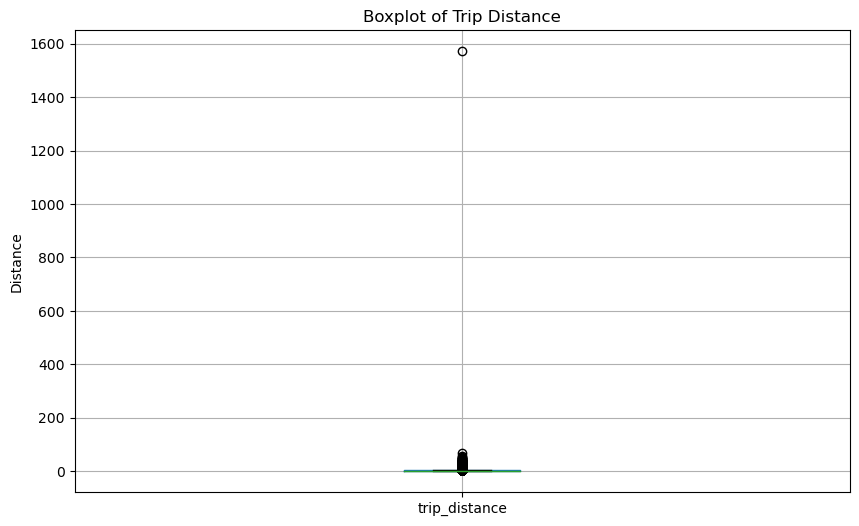

In [1107]:
plt.figure(figsize=(10, 6)) 
df.boxplot(column='trip_distance')
plt.title('Boxplot of Trip Distance')
plt.ylabel('Distance') 
plt.show()

In [1108]:
merged_df = merged_df[merged_df['trip_distance'] <= 200]

### Filter data 2009 & 2022 

In [1109]:
df_final = merged_df[merged_df['lpep_pickup_datetime'].dt.year == 2023]
df_final

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,1.0,2.75,0 days 00:11:01,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",Lincoln Square West,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,1.0,0.00,0 days 00:06:46,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,1.0,0.00,0 days 00:06:20,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,1.0,0.00,0 days 00:05:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,1.0,0.00,0 days 00:05:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,1.0,2.0,0.00,0 days 00:07:59,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",Saint Albans,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ..."
62939,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,1.0,0.00,0 days 00:10:45,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Park Slope,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18..."
62940,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,1.0,0.00,0 days 00:06:01,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ..."
62941,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,1.0,2.75,0 days 00:09:32,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."


### Save Data to Excel

In [1110]:
#df_final.to_excel('capstone2.xlsx', index=False)

# **Analysis**

###  **Heatmap Demand PickUP** tiap zone

kolom geometri gakebaca tableau kalau pake excel

In [1111]:
#drop yang tipenya date/time karena shapefile gaterima datetime

df2 = df_final.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime','Trip Duration'])

In [1112]:
df2

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry
0,2,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,...,24.18,1.0,1.0,2.75,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",Lincoln Square West,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22..."
1,2,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,...,15.84,1.0,1.0,0.00,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,...,11.64,1.0,1.0,0.00,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ..."
3,1,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,...,10.20,1.0,1.0,0.00,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."
4,1,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,...,8.00,1.0,1.0,0.00,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,...,17.30,1.0,2.0,0.00,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",Saint Albans,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ..."
62939,2,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,...,19.20,1.0,1.0,0.00,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Park Slope,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18..."
62940,2,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,...,14.16,1.0,1.0,0.00,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ..."
62941,2,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,...,22.50,1.0,1.0,2.75,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."


In [1113]:
# Hanya bisa 1 geometry column
#gdf = gpd.GeoDataFrame(df2.drop(columns=['DOgeometry']), geometry='PUgeometry')
#gdf.to_file('capstone2_shape.shp', driver='ESRI Shapefile')


Heatmap jumlah order

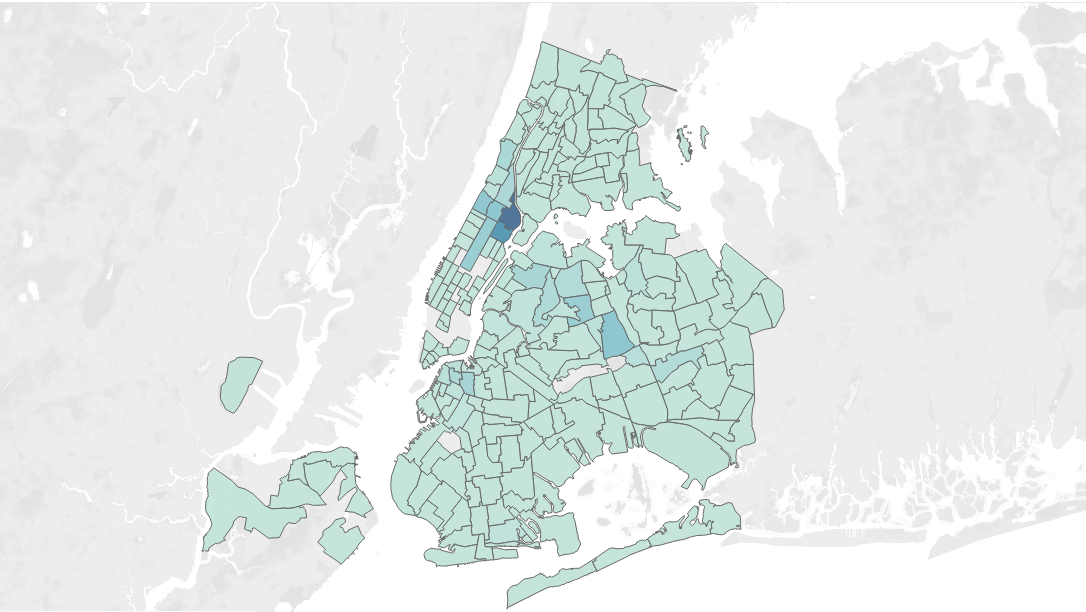

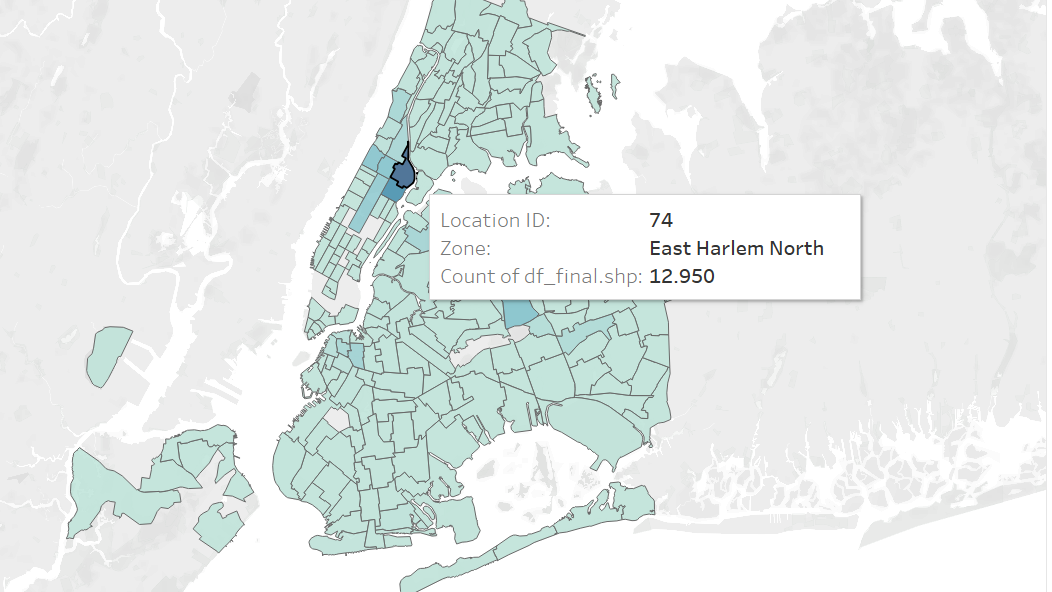

**Recomendation**
- driver dapat lebih banyak ditugaskan di aera yang demannya tinggi
- Dapat mengurangi driver - driver yang terlalu banyak menunggu di area demand yang rendah
- Area dengan demand tinggi dapat ditempatkan taxi stand jika belum ada

### Rush hour on **Weekdays/Weekend**

In [1114]:
df_final

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,1.0,2.75,0 days 00:11:01,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",Lincoln Square West,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22..."
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,1.0,0.00,0 days 00:06:46,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,1.0,0.00,0 days 00:06:20,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ..."
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,1.0,0.00,0 days 00:05:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,1.0,0.00,0 days 00:05:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,1.0,2.0,0.00,0 days 00:07:59,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",Saint Albans,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ..."
62939,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,1.0,0.00,0 days 00:10:45,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Park Slope,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18..."
62940,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,1.0,0.00,0 days 00:06:01,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ..."
62941,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,1.0,2.75,0 days 00:09:32,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22..."


##### **Weekdays** Filter

In [1115]:
weekdays = merged_df[merged_df['lpep_pickup_datetime'].dt.dayofweek < 5]


weekdays['hour'] = weekdays['lpep_pickup_datetime'].dt.hour

weekdays



C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\2172675844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekdays['hour'] = weekdays['lpep_pickup_datetime'].dt.hour


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry,hour
283,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,1.0,0.00,0 days 00:11:37,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",Corona,Queens,"POLYGON ((1024813.399 211643.796, 1024910.997 ...",14
303,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,1.0,2.75,0 days 00:37:24,Woodside,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",Midtown South,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21...",14
1253,2,2023-01-02 00:29:17,2023-01-02 00:44:52,N,1.0,66,229,1.0,6.87,28.9,...,1.0,2.75,0 days 00:15:35,DUMBO/Vinegar Hill,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.460 19...",Sutton Place/Turtle Bay North,Manhattan,"POLYGON ((994880.664 214401.395, 994724.359 21...",0
1254,2,2023-01-02 00:09:06,2023-01-02 00:42:55,N,1.0,41,42,1.0,9.52,42.2,...,1.0,2.75,0 days 00:33:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Central Harlem North,Manhattan,"POLYGON ((1002413.191 243934.560, 1002388.021 ...",0
1255,1,2023-01-02 00:29:13,2023-01-02 00:37:37,N,1.0,91,71,1.0,0.00,15.2,...,1.0,0.00,0 days 00:08:24,Flatlands,Brooklyn,"POLYGON ((1006603.698 172518.990, 1006615.004 ...",East Flatbush/Farragut,Brooklyn,"POLYGON ((1003181.136 178017.614, 1003226.756 ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,2.0,0.00,0 days 00:07:59,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",Saint Albans,Queens,"POLYGON ((1049028.760 195325.647, 1049096.735 ...",23
62939,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,0.00,0 days 00:10:45,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Park Slope,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.590 18...",23
62940,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,0.00,0 days 00:06:01,Washington Heights South,Manhattan,"POLYGON ((1000658.690 249440.205, 1000658.740 ...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ...",23
62941,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,2.75,0 days 00:09:32,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22...",23


In [1116]:
hourly_orders = weekdays.groupby('hour').size().reset_index(name='number_of_orders')
hourly_orders

,hour,number_of_orders
0,0,538
1,1,332
2,2,221
3,3,218
4,4,151
5,5,253
6,6,773
7,7,2155
8,8,2554
9,9,2659


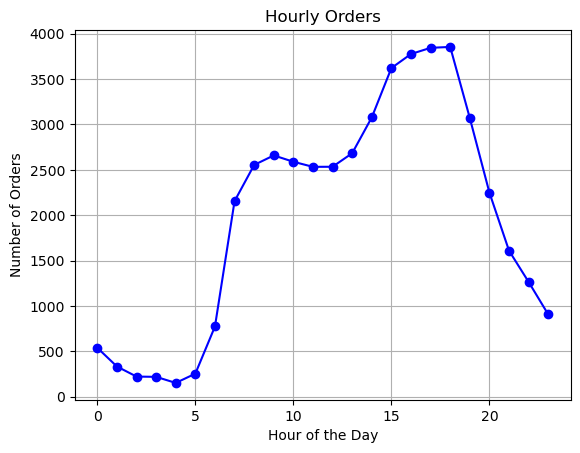

In [1117]:
plt.plot(hourly_orders['hour'], hourly_orders['number_of_orders'], marker='o', linestyle='-', color='b')


plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hourly Orders')
plt.grid()

plt.show()

- Demand mulai naik di jam 8-18
- Demand tertinggi di jam 15-18 pada weekdays
- Armada taxi harus dipastikan mencukupi terutama di jam - jam tersebut

##### Spatial file untuk weekdays (Tableau)

In [1118]:
weekdays_shape = weekdays.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime','Trip Duration', 'hour'])

In [1119]:
#weekdays_gdf = gpd.GeoDataFrame(weekdays_shape.drop(columns=['DOgeometry']), geometry='PUgeometry')
#weekdays_gdf.to_file('weekdays_shape.shp', driver='ESRI Shapefile')



Heatmap Weekdays

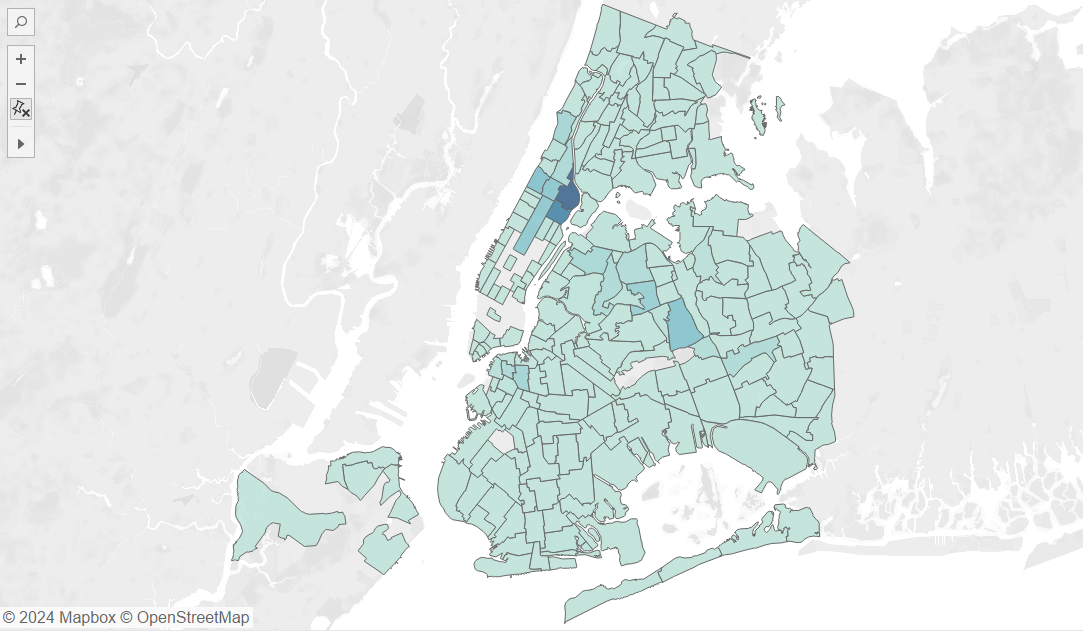

##### **Weekend** Filter

In [1120]:
weekends = df_final[df_final['lpep_pickup_datetime'].dt.dayofweek >= 5]
weekends['hour'] = weekends['lpep_pickup_datetime'].dt.hour

weekends

C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\4025802921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends['hour'] = weekends['lpep_pickup_datetime'].dt.hour


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry,hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,0 days 00:11:01,Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",Lincoln Square West,Manhattan,"POLYGON ((989338.100 223572.253, 989368.225 22...",0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,0 days 00:06:46,Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,0 days 00:06:20,Steinway,Queens,"POLYGON ((1010142.087 227174.978, 1011245.342 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ...",0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,0 days 00:05:49,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22...",0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,0 days 00:05:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58716,2,2023-01-29 23:38:14,2023-01-29 23:49:42,N,1.0,74,247,1.0,2.36,13.5,...,1.0,0.00,0 days 00:11:28,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",West Concourse,Bronx,"POLYGON ((1008537.234 246182.774, 1008487.070 ...",23
58717,2,2023-01-29 23:31:01,2023-01-29 23:37:50,N,1.0,7,179,1.0,1.04,7.9,...,1.0,0.00,0 days 00:06:49,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ...",23
58718,2,2023-01-29 23:45:08,2023-01-29 23:52:13,N,1.0,74,166,1.0,1.58,10.0,...,1.0,0.00,0 days 00:07:05,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Morningside Heights,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23...",23
58719,2,2023-01-29 23:01:47,2023-01-29 23:11:30,N,1.0,226,260,1.0,1.46,11.4,...,1.0,0.00,0 days 00:09:43,Sunnyside,Queens,"POLYGON ((1009214.710 212202.191, 1009143.168 ...",Woodside,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",23


In [1121]:
hourly_orders_weekends = weekends.groupby('hour').size().reset_index(name='number_of_orders')
hourly_orders_weekends


,hour,number_of_orders
0,0,476
1,1,454
2,2,340
3,3,304
4,4,235
5,5,120
6,6,102
7,7,222
8,8,315
9,9,490


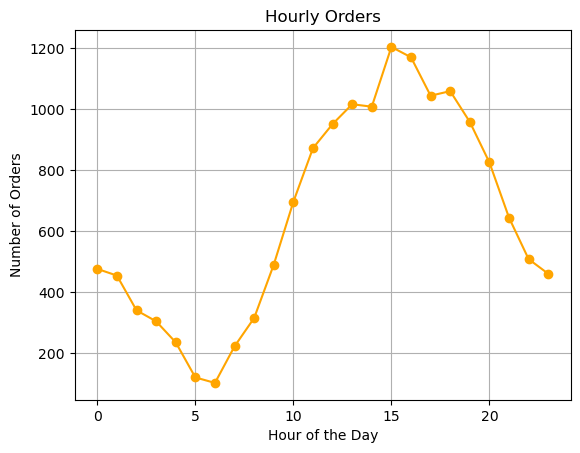

In [1122]:
plt.plot(hourly_orders_weekends['hour'], hourly_orders_weekends['number_of_orders'], marker='o', linestyle='-', color='orange')


plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hourly Orders')
plt.grid()

plt.show()

- demand mulai naik di jam 7
- demand tertinggi di jam 16-17
- Armada taxi harus dipastikan mencukupi terutama di jam - jam tersebut

##### Spatial file untuk weekend (Tableau) 

In [1123]:
weekends_shape = weekends.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime','Trip Duration', 'hour'])

In [1124]:
weekends_gdf = gpd.GeoDataFrame(weekends_shape.drop(columns=['DOgeometry']), geometry='PUgeometry')
weekends_gdf.to_file('weekdends_shape.shp', driver='ESRI Shapefile')

C:\Users\elmah\AppData\Local\Temp\ipykernel_30744\819453470.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  weekends_gdf.to_file('weekdends_shape.shp', driver='ESRI Shapefile')


Heatmap weekend

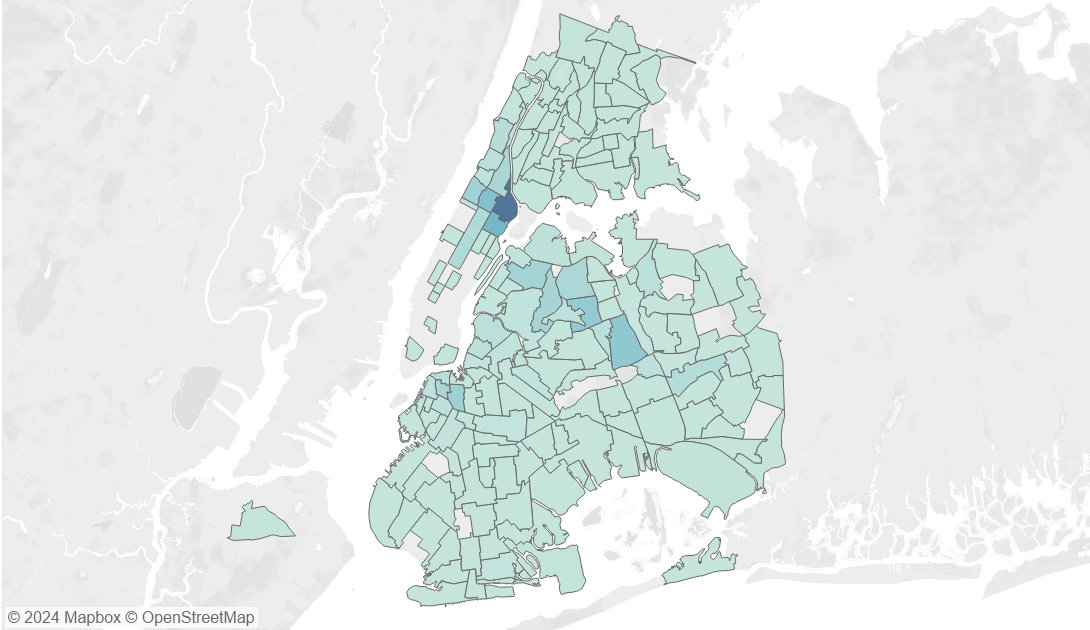

##### Grafik Gabungan

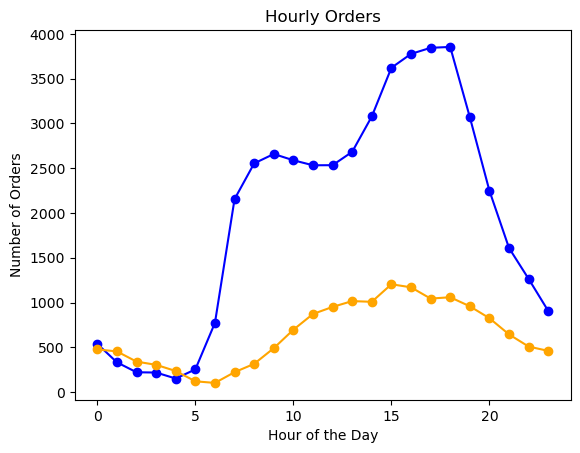

In [1125]:
plt.plot(hourly_orders['hour'], hourly_orders['number_of_orders'], marker='o', linestyle='-', color='blue', label='Weekdays')
plt.plot(hourly_orders_weekends['hour'], hourly_orders_weekends['number_of_orders'], marker='o', linestyle='-', color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hourly Orders')

plt.show()

##### Zone Demand di rush hour

Menunjukan **dimana** driver harus berada ketika rush-hour

- weekend

In [1126]:
rushhour_we = weekends[(weekends['lpep_pickup_datetime'].dt.hour >= 13) & (weekends['lpep_pickup_datetime'].dt.hour < 18)]
rushhour_we

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry,hour
489,2,2023-01-01 13:01:05,2023-01-01 13:15:33,N,1.0,260,179,1.0,3.62,19.1,...,1.0,0.00,0 days 00:14:28,Woodside,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",Old Astoria,Queens,"POLYGON ((1002832.826 222710.105, 1002868.476 ...",13
531,2,2023-01-01 13:43:17,2023-01-01 14:13:53,N,1.0,41,114,1.0,7.53,37.3,...,1.0,2.75,0 days 00:30:36,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Greenwich Village South,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20...",13
532,2,2023-01-01 13:33:00,2023-01-01 13:35:39,N,1.0,75,236,1.0,0.90,5.8,...,1.0,2.75,0 days 00:02:39,East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",Upper East Side North,Manhattan,"POLYGON ((995940.048 221122.920, 995812.322 22...",13
533,2,2023-01-01 13:50:24,2023-01-01 14:11:40,N,1.0,75,142,1.0,2.91,21.2,...,1.0,2.75,0 days 00:21:16,East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",Lincoln Square East,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",13
534,2,2023-01-01 13:51:59,2023-01-01 13:57:38,N,1.0,41,75,1.0,1.25,7.9,...,1.0,0.00,0 days 00:05:39,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58307,2,2023-01-29 17:23:52,2023-01-29 17:33:42,N,1.0,95,196,1.0,1.13,10.7,...,1.0,0.00,0 days 00:09:50,Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",Rego Park,Queens,"POLYGON ((1023709.727 204759.778, 1023685.760 ...",17
58348,2,2023-01-29 17:57:45,2023-01-29 18:14:37,N,1.0,82,138,1.0,4.33,22.6,...,1.0,0.00,0 days 00:16:52,Elmhurst,Queens,"POLYGON ((1020914.132 210389.714, 1020968.229 ...",LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",17
58358,2,2023-01-29 16:37:52,2023-01-29 16:45:21,N,1.0,74,236,1.0,1.65,10.0,...,1.0,0.00,0 days 00:07:29,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper East Side North,Manhattan,"POLYGON ((995940.048 221122.920, 995812.322 22...",16
58359,2,2023-01-29 17:02:25,2023-01-29 17:14:25,N,1.0,74,116,1.0,1.78,12.8,...,1.0,0.00,0 days 00:12:00,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Hamilton Heights,Manhattan,"POLYGON ((1001062.709 241053.769, 1000940.914 ...",17


In [1127]:
sort_we = rushhour_we.groupby('PUzoneNAME').size()
sort_we = sort_we.sort_values(ascending=False).reset_index(name='count')
sort_we.head(10)

,PUzoneNAME,count
0,East Harlem North,1320
1,East Harlem South,480
2,Central Harlem,453
3,Elmhurst,327
4,Fort Greene,316
5,Forest Hills,307
6,Morningside Heights,236
7,Downtown Brooklyn/MetroTech,219
8,Astoria,174
9,Central Harlem North,174


In [1128]:
rushhourwe_shape = rushhour_we.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime','Trip Duration', 'hour'])

In [1129]:
#rushhourwe_gdf = gpd.GeoDataFrame(rushhourwe_shape , geometry='geometry')
#rushhourwe_gdf.to_file('rushhourwe_shape.shp', driver='ESRI Shapefile')

- weekdays

In [1130]:
rushhour_wd = weekdays[(weekdays['lpep_pickup_datetime'].dt.hour >= 15) & (weekdays['lpep_pickup_datetime'].dt.hour < 18)]
rushhour_wd

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry,hour
1904,2,2023-01-02 15:01:58,2023-01-02 15:11:24,N,1.0,65,49,1.0,1.21,7.5,...,1.0,0.00,0 days 00:09:26,Downtown Brooklyn/MetroTech,Brooklyn,"POLYGON ((987819.980 194536.761, 987838.631 19...",Clinton Hill,Brooklyn,"POLYGON ((995169.765 192967.111, 995298.245 19...",15
1958,2,2023-01-02 16:02:14,2023-01-02 16:04:18,N,1.0,75,75,1.0,0.58,5.1,...,1.0,0.00,0 days 00:02:04,East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",16
1959,2,2023-01-02 15:13:22,2023-01-02 15:33:17,N,1.0,92,92,1.0,2.27,18.4,...,1.0,0.00,0 days 00:19:55,Flushing,Queens,"POLYGON ((1032288.994 220089.809, 1032291.399 ...",Flushing,Queens,"POLYGON ((1032288.994 220089.809, 1032291.399 ...",15
1960,2,2023-01-02 15:39:10,2023-01-02 15:48:26,N,1.0,95,95,1.0,0.96,10.7,...,1.0,0.00,0 days 00:09:16,Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",15
1961,2,2023-01-02 15:28:38,2023-01-02 15:39:51,N,1.0,74,238,1.0,2.33,14.2,...,1.0,0.00,0 days 00:11:13,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper West Side North,Manhattan,"POLYGON ((992877.880 225627.534, 992741.735 22...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62396,2,2023-01-31 15:58:17,2023-01-31 16:09:06,N,1.0,74,263,1.0,1.92,12.8,...,1.0,2.75,0 days 00:10:49,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Yorkville West,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",15
62397,2,2023-01-31 16:19:39,2023-01-31 16:29:13,N,1.0,74,236,1.0,1.55,11.4,...,1.0,2.75,0 days 00:09:34,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",Upper East Side North,Manhattan,"POLYGON ((995940.048 221122.920, 995812.322 22...",16
62463,2,2023-01-31 17:55:54,2023-01-31 18:06:07,N,1.0,41,24,2.0,1.64,11.4,...,1.0,0.00,0 days 00:10:13,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",Bloomingdale,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23...",17
62494,2,2023-01-31 17:59:34,2023-01-31 18:11:12,N,1.0,75,42,1.0,1.82,12.1,...,1.0,0.00,0 days 00:11:38,East Harlem South,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",Central Harlem North,Manhattan,"POLYGON ((1002413.191 243934.560, 1002388.021 ...",17


In [1131]:
sort_wd = rushhour_wd.groupby('PUzoneNAME').size()
sort_wd = sort_wd.sort_values(ascending=False).reset_index(name='count')
sort_wd.head(10)

,PUzoneNAME,count
0,East Harlem South,2272
1,East Harlem North,1622
2,Morningside Heights,808
3,Central Park,766
4,Forest Hills,729
5,Elmhurst,556
6,Central Harlem,549
7,Fort Greene,420
8,Washington Heights South,373
9,Astoria,288


In [1132]:
rushhourwd_shape = rushhour_wd.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime','Trip Duration', 'hour'])

In [1133]:
#rushhourwd_gdf = gpd.GeoDataFrame(rushhourwd_shape , geometry='geometry')
#rushhourwd_gdf.to_file('rushhourwd_shape.shp', driver='ESRI Shapefile')

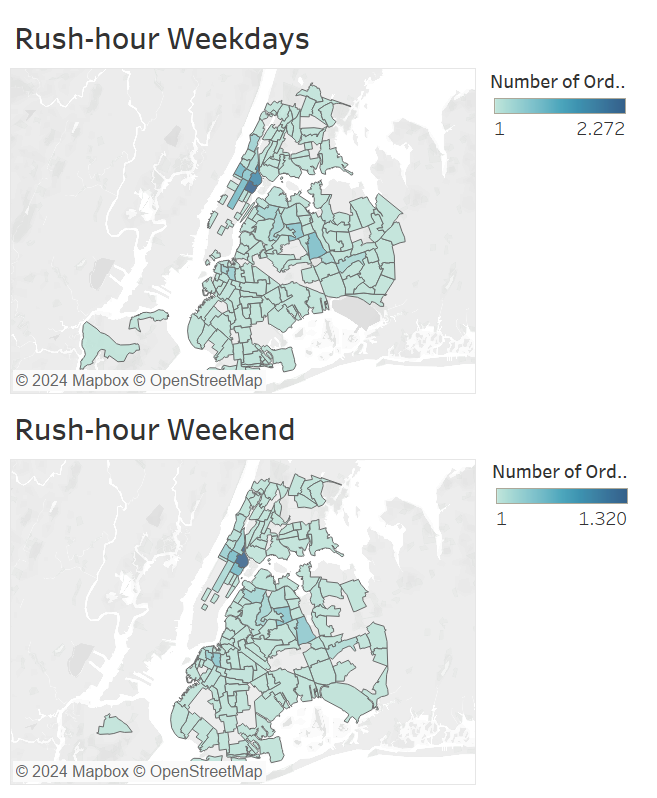

### Perbedaan jumlah order weekdays/weekends (per day)

- Besar kenaikan jumlah trip pada weekdays dibandingkan dengan weekend dapat membantu menentukan dan memastikan kesediaan armada

In [1134]:
len(weekends)

15473

In [1135]:
len(weekdays)

47469

In [1136]:
num_weekdays = 5  # Monday-Friday
num_weekend_days = 2  # Saturday-Sunday


avg_orders_per_day_weekdays = (len(weekdays)) / num_weekdays
avg_orders_per_day_weekends = len(weekends) / num_weekend_days

percentage_change = ((avg_orders_per_day_weekdays - avg_orders_per_day_weekends) / avg_orders_per_day_weekends) * 100

print(f"Average orders per day - Weekdays: {avg_orders_per_day_weekdays:.2f}")
print(f"Average orders per day - Weekends: {avg_orders_per_day_weekends:.2f}")
print(f"Percentage change from weekends to weekdays: {percentage_change:.2f}%")

Average orders per day - Weekdays: 9493.80
Average orders per day - Weekends: 7736.50
Percentage change from weekends to weekdays: 22.71%


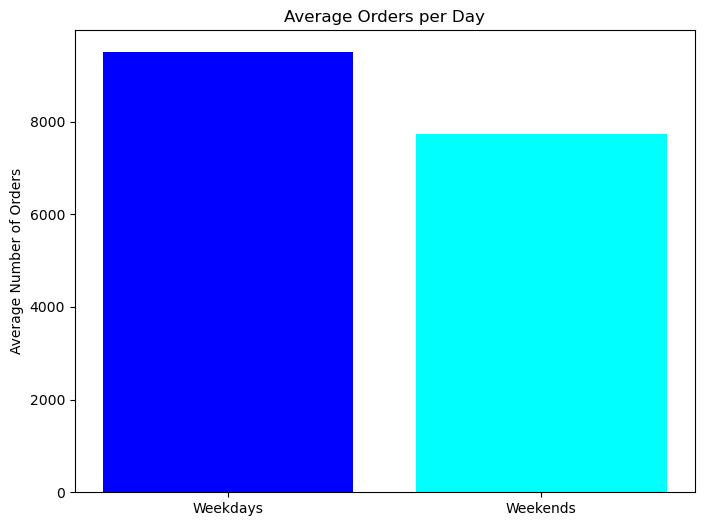

In [1137]:
categories = ['Weekdays', 'Weekends']
values = [avg_orders_per_day_weekdays, avg_orders_per_day_weekends]

plt.figure(figsize=(8, 6)) 
plt.bar(categories, values, color=['blue', 'cyan']) 
plt.title('Average Orders per Day')  
plt.ylabel('Average Number of Orders')
plt.show() 

### Zone dengan Rata2 **Trip Duration** terbesar

- Driver yang sedang mengambil order di area tersebut harus siap commit selama rata - rata trip duration

In [1138]:
durationperzone = df_final.groupby('PUzoneNAME')['Trip Duration'].mean().reset_index()
durationperzone.columns = ['Zone', 'Average Trip Duration']

durationperzone

,Zone,Average Trip Duration
0,Allerton/Pelham Gardens,0 days 00:11:09.800000
1,Astoria,0 days 00:16:44.096218020
2,Auburndale,0 days 00:28:34.100000
3,Baisley Park,0 days 00:21:30.666666666
4,Bath Beach,0 days 00:24:13.400000
...,...,...
211,Woodlawn/Wakefield,0 days 00:29:00.600000
212,Woodside,0 days 00:20:41.702919708
213,World Trade Center,0 days 00:32:29
214,Yorkville East,0 days 00:17:12.375000


In [1139]:
durationperzone = durationperzone.sort_values(by='Average Trip Duration', ascending=False)

In [1140]:
durationperzone.head(10)

,Zone,Average Trip Duration
157,Riverdale/North Riverdale/Fieldston,0 days 02:20:11.833333333
188,Union Sq,0 days 01:24:49
126,Midtown Center,0 days 01:13:23
26,Bushwick South,0 days 01:09:28.958333333
74,Flatiron,0 days 01:06:51
112,Lincoln Square West,0 days 01:04:14
129,Morrisania/Melrose,0 days 01:00:49.571428571
36,Clinton East,0 days 00:55:09.500000
183,Sutton Place/Turtle Bay North,0 days 00:50:41
71,Financial District North,0 days 00:50:23


In [1141]:
durationperzone['Average Trip Duration'] = durationperzone['Average Trip Duration'].dt.total_seconds() / 60.0

In [1142]:
durationperzone.head(10)

,Zone,Average Trip Duration
157,Riverdale/North Riverdale/Fieldston,140.197222
188,Union Sq,84.816667
126,Midtown Center,73.383333
26,Bushwick South,69.482639
74,Flatiron,66.850000
112,Lincoln Square West,64.233333
129,Morrisania/Melrose,60.826190
36,Clinton East,55.158333
183,Sutton Place/Turtle Bay North,50.683333
71,Financial District North,50.383333


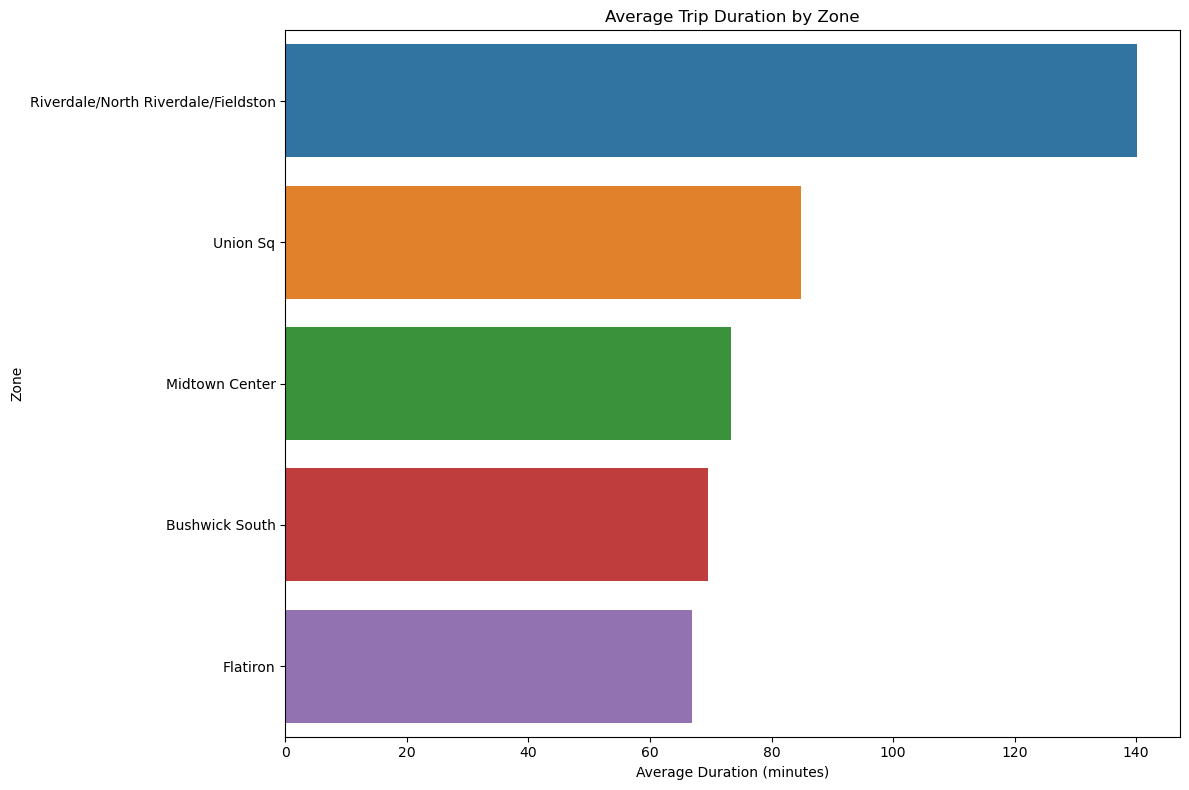

In [1143]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Average Trip Duration', y='Zone', data=durationperzone.head())
plt.title('Average Trip Duration by Zone')
plt.ylabel('Zone')
plt.xlabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()

### Zona Asal pickup location passanger yang menuju Airport

- Perusahaan taxi dapat bekerja sama dengan airport (Pemerintah) untuk dapat mengadakan exclusive service rights/diskon dari zona - zona lain selain zona pickup yang populer.
- Mendorong passanger untuk memesan taxi di zona lain selain zona yang 'crowded'
- Hal tersebut dapat mengurangi kemacetan dan menambah pengguna taxi (akibat dari pengadaan diskon di zona lain)

In [1144]:
dolag = df_final[df_final['DOzoneNAME'] == 'LaGuardia Airport']

In [1145]:
route_lag = dolag.groupby(['PUzoneNAME', 'DOzoneNAME']).size().reset_index(name='Count')
route_lag = route_lag.sort_values(by='Count', ascending=False)
route_lag.head(10)

,PUzoneNAME,DOzoneNAME,Count
14,Elmhurst,LaGuardia Airport,404
11,East Harlem North,LaGuardia Airport,187
48,Woodside,LaGuardia Airport,107
15,Elmhurst/Maspeth,LaGuardia Airport,75
23,Jackson Heights,LaGuardia Airport,60
18,Forest Hills,LaGuardia Airport,37
12,East Harlem South,LaGuardia Airport,35
4,Central Harlem,LaGuardia Airport,31
10,Downtown Brooklyn/MetroTech,LaGuardia Airport,29
33,Morningside Heights,LaGuardia Airport,28


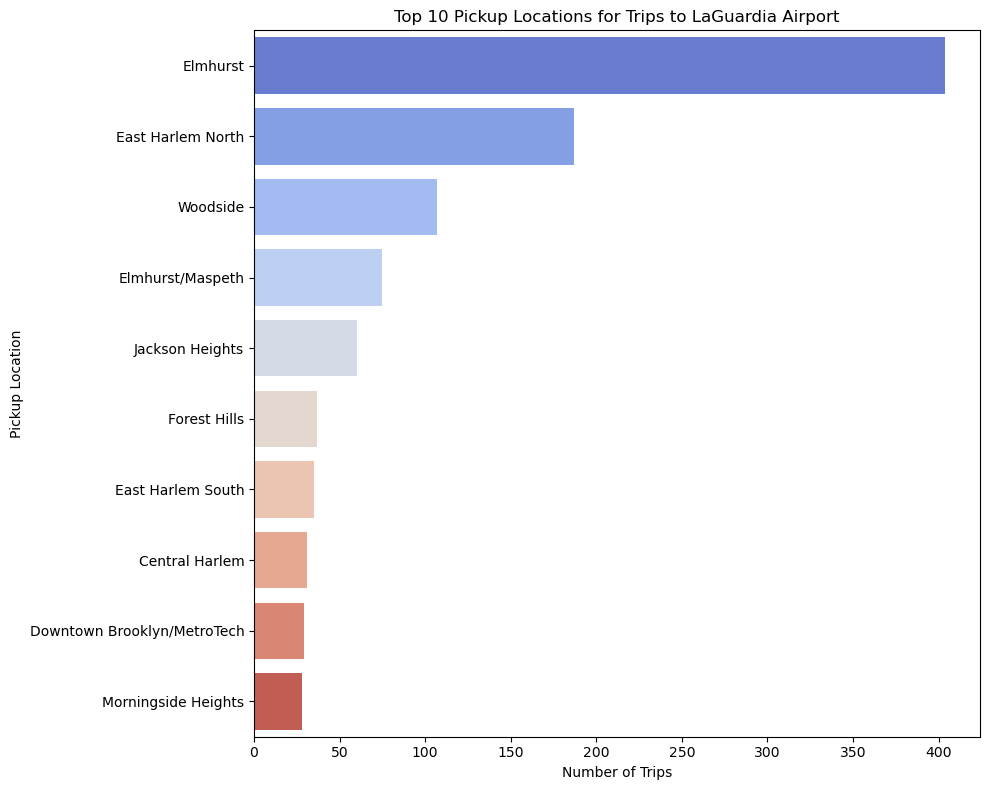

In [1146]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='PUzoneNAME', data=route_lag.head(10), palette='coolwarm')
plt.title('Top 10 Pickup Locations for Trips to LaGuardia Airport')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Location')
plt.tight_layout()
plt.show()

In [1147]:
dojfk = df_final[df_final['DOzoneNAME'] == 'JFK Airport']
dojfk

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Trip Duration,PUzoneNAME,PUboroughNAME,PUgeometry,DOzoneNAME,DOboroughNAME,DOgeometry
292,2,2023-01-01 07:22:22,2023-01-01 07:44:27,N,1.0,7,132,1.0,14.24,54.8,...,1.0,1.0,0.0,0 days 00:22:05,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
306,2,2023-01-01 07:22:01,2023-01-01 07:32:33,N,5.0,130,132,1.0,5.19,20.0,...,1.0,2.0,0.0,0 days 00:10:32,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
404,2,2023-01-01 10:10:35,2023-01-01 10:19:55,N,1.0,130,132,1.0,4.24,18.4,...,1.0,1.0,0.0,0 days 00:09:20,Jamaica,Queens,"POLYGON ((1048117.059 198683.432, 1047994.802 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
452,2,2023-01-01 11:41:32,2023-01-01 11:55:02,N,1.0,95,132,1.0,7.38,29.6,...,2.0,1.0,0.0,0 days 00:13:30,Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
460,2,2023-01-01 11:10:46,2023-01-01 11:52:44,N,2.0,41,132,1.0,20.55,70.0,...,1.0,1.0,0.0,0 days 00:41:58,Central Harlem,Manhattan,"POLYGON ((998716.913 234240.397, 999458.736 23...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62078,2,2023-01-31 16:56:35,2023-01-31 17:14:24,N,1.0,77,132,1.0,7.61,31.0,...,2.0,1.0,0.0,0 days 00:17:49,East New York/Pennsylvania Avenue,Brooklyn,"POLYGON ((1012068.989 185393.105, 1012181.197 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
62305,2,2023-01-31 17:20:55,2023-01-31 18:20:28,N,2.0,42,132,1.0,17.78,70.0,...,2.0,1.0,0.0,0 days 00:59:33,Central Harlem North,Manhattan,"POLYGON ((1002413.191 243934.560, 1002388.021 ...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
62345,2,2023-01-31 18:05:45,2023-01-31 18:50:40,N,2.0,43,132,1.0,18.81,70.0,...,1.0,1.0,0.0,0 days 00:44:55,Central Park,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
62385,2,2023-01-31 18:04:24,2023-01-31 18:44:10,N,2.0,74,132,1.0,17.04,70.0,...,1.0,1.0,0.0,0 days 00:39:46,East Harlem North,Manhattan,"MULTIPOLYGON (((1002572.276 236761.574, 100256...",JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


In [1148]:
route_jfk = dojfk.groupby(['PUzoneNAME', 'DOzoneNAME']).size().reset_index(name='Count')
route_jfk = route_jfk.sort_values(by='Count', ascending=False)
route_jfk.head(10)

,PUzoneNAME,DOzoneNAME,Count
31,Jamaica,JFK Airport,64
25,Forest Hills,JFK Airport,62
32,Kew Gardens,JFK Airport,37
15,East Harlem North,JFK Airport,32
16,East Harlem South,JFK Airport,25
34,Morningside Heights,JFK Airport,23
14,Downtown Brooklyn/MetroTech,JFK Airport,15
8,Central Harlem,JFK Airport,14
55,Woodside,JFK Airport,10
43,Rego Park,JFK Airport,10


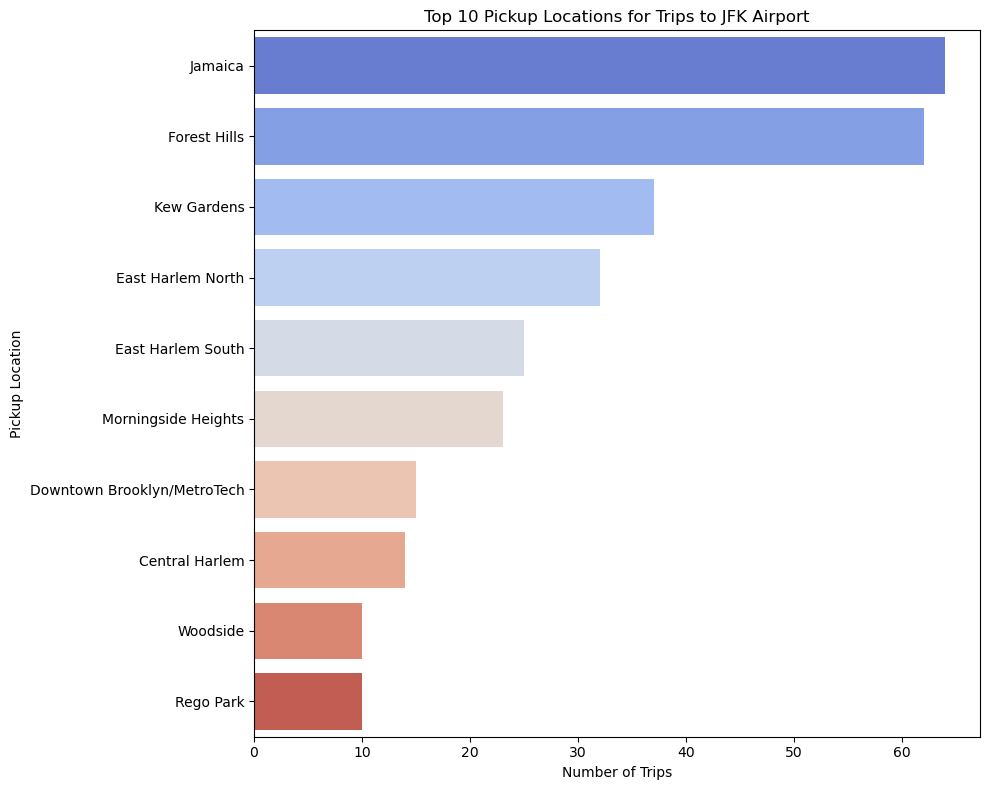

In [1149]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='PUzoneNAME', data=route_jfk.head(10), palette='coolwarm')
plt.title('Top 10 Pickup Locations for Trips to JFK Airport')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Location')
plt.tight_layout()
plt.show()

- demand laguardia lebih besar dari JFK (padahal jfk airport lebih besar). 
- dapat memungkinkan diakibatkan oleh kurangnya sarana/service transportasi publik untuk mengakses laguardia
- perusahaan taxi ini dapat memanfaatkan deman laguardia tersebut untuk menyaingi transportasi publik untuk meningkatkan profit.

#### Tableau Mapbox Airport Trips

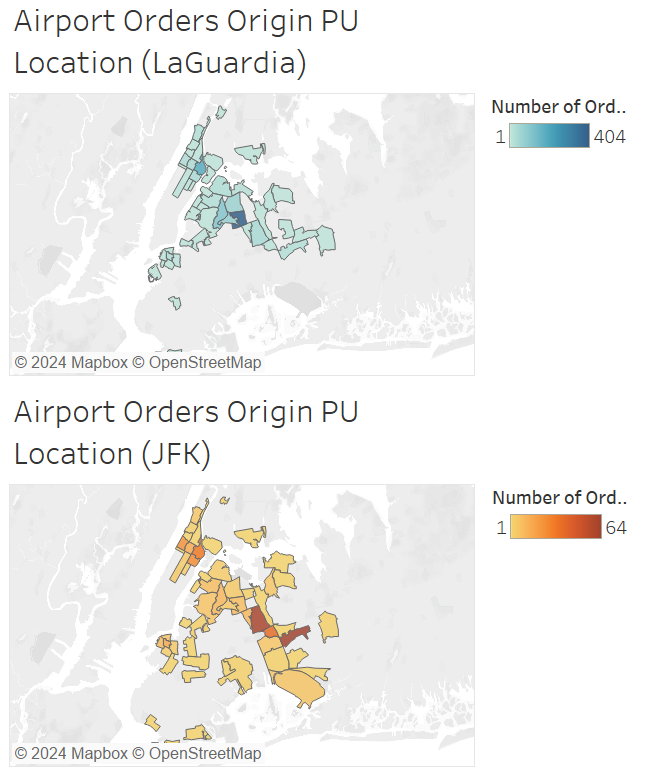

## **Conclusion & Recomendation**

1. Heatmap demand dapat dijadikan acuan untuk para driver untuk lebih banyak menargetkan area dengan demand tinggi dan mengurangi driver yang menunggu order di demand area yang rendah.
2. Terdapat kenaikan demand pada waktu rush-hour dan weekdays (22%), dapat dilakukan analisa/eksperimen lebih lanjut apakah driver sudah mencukupi kebutuhan demand pada waktu tersebut atau tidak.
3. Durasi Trip pada zona tertentu menempuh jumlah waktu yang lama sehingga driver diwajiban berkomitmen pada rentang waktu yang tertera ketika sedang mengambil passanger di zona - zona tersebut.
4. Perusahaan taxi dapat bekerja sama dengan airport (Pemerintah) untuk dapat mengadakan exclusive service rights/diskon dari zona - zona lain selain zona pickup yang populer.
    - Mendorong passanger untuk memesan taxi di zona lain selain zona yang 'crowded'.
    - Dapat mengurangi kemacetan dan penumpukan order pada 1 zona.
    - Taxi sebagai substitusi public transport yang minim/service buruk